# Analysis Spectral Bands

## Packages and Data

In [5]:
import os
import sys

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.data_loader import DataLoader
from utils.calculate_indices import CalculateIndices
from utils.sits_outlier_cleaner import SITSOutlierCleaner
from utils.constants import spectral_bands, indices

In [7]:
dataloader = DataLoader()
df_base = dataloader.load_transform("../../data/Trainings_Datensatz.csv")
df = dataloader.date_feature_extraction(df_base)
df = dataloader.feature_extraction(df)

In [8]:
calculateindices = CalculateIndices()
df = calculateindices.add_all_indices(df)

## Strange Values

In [ ]:
# 74 rows with reip = inf or -inf (because b5 = b6)
# 425 rows with mcari = inf (because b4 = 0)

In [35]:
df[df["reip"].isin([np.inf, -np.inf])]

,time,id,disturbance_year,doy,b2,b3,b4,b5,b6,b7,...,ndvi,gndvi,wdvi,tndvi,savi,ipvi,mcari,reip,masvi2,dvi
30342,2022-08-09,212,2017.0,221.0,1396.0,2007.0,2821.0,3034.0,3034.0,3102.0,...,0.090147,0.214328,1969.5,0.768210,0.135209,0.545073,183.266076,-inf,-0.999704,559.0
99159,2020-05-09,714,0.0,130.0,1007.0,1235.0,1560.0,1917.0,1917.0,2235.0,...,0.187923,0.288184,1502.0,0.829411,0.281848,0.593961,350.958462,-inf,-0.999562,722.0
175996,2019-04-15,1262,0.0,105.0,226.0,348.0,153.0,115.0,115.0,130.0,...,-0.200000,-0.456067,25.5,0.547723,-0.299413,0.400000,-22.849673,inf,-0.990243,-51.0
176033,2020-06-30,1262,0.0,182.0,259.0,449.0,141.0,118.0,118.0,146.0,...,0.037543,-0.509244,81.5,0.733173,0.056218,0.518771,-15.398582,inf,-0.993442,11.0
247043,2021-09-05,1771,0.0,248.0,909.0,1069.0,1185.0,1218.0,1218.0,1379.0,...,0.059524,0.126634,742.5,0.748013,0.089268,0.529762,27.135190,-inf,-0.999251,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555098,2020-05-07,25550,0.0,128.0,180.0,177.0,55.0,41.0,41.0,42.0,...,0.140625,-0.616438,45.5,0.800391,0.210117,0.570312,-8.349091,inf,-0.986393,18.0
3595345,2022-03-22,25844,2017.0,81.0,1715.0,2068.0,2213.0,2375.0,2375.0,2420.0,...,0.054071,0.078431,1359.5,0.744360,0.081098,0.527036,139.087212,-inf,-0.999595,253.0
3736640,2020-08-04,26853,0.0,217.0,1035.0,1555.0,2122.0,2370.0,2370.0,2522.0,...,0.141238,0.237184,1759.0,0.800774,0.211836,0.570619,221.587182,-inf,-0.999645,698.0
3824682,2018-10-15,27479,0.0,288.0,980.0,1201.0,1474.0,1633.0,1633.0,1795.0,...,0.099297,0.198264,1062.0,0.774143,0.148923,0.549649,140.921031,-inf,-0.999444,325.0


In [11]:
df[(df["mcari"] == np.inf)]  # b4 = 0 does not make sense, maybe anomaly?
# Test if values still exists after anaomaly detection

,time,id,disturbance_year,doy,b2,b3,b4,b5,b6,b7,...,ndvi,gndvi,wdvi,tndvi,savi,ipvi,mcari,reip,masvi2,dvi
6391,2019-01-20,46,0.0,20.0,25.0,102.0,0.0,232.0,1007.0,1174.0,...,1.0,0.840125,1409.0,1.224745,1.499468,1.0,inf,-29.692903,-0.999291,1409.0
6473,2021-12-21,46,0.0,355.0,51.0,83.0,0.0,89.0,471.0,623.0,...,1.0,0.764873,518.0,1.224745,1.498554,1.0,inf,-31.018325,-0.998071,518.0
17876,2020-01-19,128,2020.0,19.0,53.0,31.0,0.0,31.0,73.0,66.0,...,1.0,0.360825,87.0,1.224745,1.491429,1.0,inf,-15.500000,-0.988571,87.0
24227,2018-12-12,173,0.0,346.0,194.0,264.0,0.0,282.0,828.0,844.0,...,1.0,0.523466,1085.0,1.224745,1.499309,1.0,inf,-30.150183,-0.999079,1085.0
35218,2021-11-21,248,0.0,325.0,54.0,126.0,0.0,297.0,1273.0,1630.0,...,1.0,0.856492,1733.0,1.224745,1.499567,1.0,inf,-32.988730,-0.999423,1733.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846613,2018-12-30,27635,0.0,364.0,177.0,75.0,0.0,172.0,628.0,642.0,...,1.0,0.790795,492.0,1.224745,1.498477,1.0,inf,-27.000000,-0.997970,492.0
3882786,2017-12-16,27897,0.0,350.0,29.0,93.0,0.0,242.0,1007.0,1261.0,...,1.0,0.862629,1097.0,1.224745,1.499317,1.0,inf,-32.368627,-0.999089,1097.0
3885826,2021-12-29,27916,0.0,363.0,57.0,124.0,0.0,196.0,813.0,1054.0,...,1.0,0.789474,1129.0,1.224745,1.499336,1.0,inf,-33.348460,-0.999115,1129.0
3906522,2019-12-05,28063,0.0,339.0,31.0,120.0,0.0,191.0,867.0,1119.0,...,1.0,0.806295,1441.0,1.224745,1.499480,1.0,inf,-32.353550,-0.999306,1441.0


## Why sometimes b5 = b6?

In [43]:
df[df["b6"] == df["b5"]].groupby("species").size()

species
Norway_spruce           1
Norway_spruce_mixed     1
beech                   1
soil                   71
dtype: int64

In [13]:
df[df["b6"] == df["b5"]]

,time,id,disturbance_year,doy,b2,b3,b4,b5,b6,b7,...,ndvi,gndvi,wdvi,tndvi,savi,ipvi,mcari,reip,masvi2,dvi
30342,2022-08-09,212,2017.0,221.0,1396.0,2007.0,2821.0,3034.0,3034.0,3102.0,...,0.090147,0.214328,1969.5,0.768210,0.135209,0.545073,183.266076,-inf,-0.999704,559.0
99159,2020-05-09,714,0.0,130.0,1007.0,1235.0,1560.0,1917.0,1917.0,2235.0,...,0.187923,0.288184,1502.0,0.829411,0.281848,0.593961,350.958462,-inf,-0.999562,722.0
175996,2019-04-15,1262,0.0,105.0,226.0,348.0,153.0,115.0,115.0,130.0,...,-0.200000,-0.456067,25.5,0.547723,-0.299413,0.400000,-22.849673,inf,-0.990243,-51.0
176033,2020-06-30,1262,0.0,182.0,259.0,449.0,141.0,118.0,118.0,146.0,...,0.037543,-0.509244,81.5,0.733173,0.056218,0.518771,-15.398582,inf,-0.993442,11.0
247043,2021-09-05,1771,0.0,248.0,909.0,1069.0,1185.0,1218.0,1218.0,1379.0,...,0.059524,0.126634,742.5,0.748013,0.089268,0.529762,27.135190,-inf,-0.999251,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555098,2020-05-07,25550,0.0,128.0,180.0,177.0,55.0,41.0,41.0,42.0,...,0.140625,-0.616438,45.5,0.800391,0.210117,0.570312,-8.349091,inf,-0.986393,18.0
3595345,2022-03-22,25844,2017.0,81.0,1715.0,2068.0,2213.0,2375.0,2375.0,2420.0,...,0.054071,0.078431,1359.5,0.744360,0.081098,0.527036,139.087212,-inf,-0.999595,253.0
3736640,2020-08-04,26853,0.0,217.0,1035.0,1555.0,2122.0,2370.0,2370.0,2522.0,...,0.141238,0.237184,1759.0,0.800774,0.211836,0.570619,221.587182,-inf,-0.999645,698.0
3824682,2018-10-15,27479,0.0,288.0,980.0,1201.0,1474.0,1633.0,1633.0,1795.0,...,0.099297,0.198264,1062.0,0.774143,0.148923,0.549649,140.921031,-inf,-0.999444,325.0


In [14]:
def timeplot_twocols_oneid(df, col1, col2, id):
    df_sub = df[df["id"] == id]

    plt.plot(df_sub["time"], df_sub[col1], label=col1)
    plt.plot(df_sub["time"], df_sub[col2], label=col2)
    plt.title(f"{col1}, {col2} Timeseries for ID {id}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()

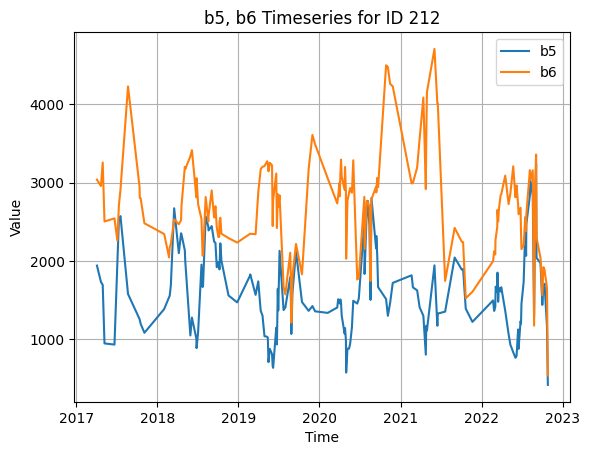

In [15]:
timeplot_twocols_oneid(df, "b5", "b6", 212)

## Test Anomaly Detection 
-> Are strange values removed?

### Apply Anomaly Detection

In [16]:
def get_sample_with_strange_values(df, id_col="id", time_col="time"):
    """df only with id's that once had reip=inf and mcari=inf"""
    ids_needed = pd.concat([
        df.loc[df["reip"].isin([np.inf, -np.inf]), id_col],
        df.loc[df["mcari"].isin([np.inf, -np.inf]), id_col]
    ]).drop_duplicates()

    df_sorted = df.sort_values(by=[id_col, time_col])

    return df_sorted[df_sorted[id_col].isin(ids_needed)]

In [ ]:
df_sample = get_sample_with_strange_values(df)

# cleaner = SITSOutlierCleaner()
# cleaner.fit_transform(df_sample, band_columns=spectral_bands)
# df_with_any_flag = cleaner.add_any_outlier_flag()
# id_df= df_with_any_flag[df_with_any_flag["id"]==24]
# df_clean = cleaner.get_interpolated_only()

# df_clean = dataloader.load_transform("../../data/df_sample_cleaned.csv")
# df_clean = dataloader.date_feature_extraction(df_clean)

# calculateindices = CalculateIndices()
# df_clean = calculateindices.add_all_indices(df_clean)

# merge missing columns
# df_sub_cols = df_sample[["id", "time", "disturbance_year", "doy", "species"]]
# df_clean = df_clean.merge(df_sub_cols, on=["id", "time"], how="left")

df_clean = dataloader.load_transform("../../data/df_sample_cleaned.csv")

### Analysis cleanded Datframe

In [ ]:
# result: 
# 425x b4=0 to 11x b4=0
# 74x b5=b6 to 66x b5=b6

In [33]:
print(len(df_sample[ (df_sample["b4"] == 0)]))
print(len(df_clean[ (df_clean["b4"] == 0)] ))

425
11


In [41]:
df_sample[df_sample["b4"] == 0].groupby("species").size()

species
Norway_spruce          111
Norway_spruce_mixed    137
Scots_pine             126
beech                    5
disturbed               36
soil                    10
dtype: int64

In [40]:
df_clean[df_clean["b4"] == 0].groupby("species").size()

species
Norway_spruce          5
Norway_spruce_mixed    6
dtype: int64

In [34]:
print(len(df_sample[ (df_sample["b5"] == df_sample["b6"])]))
print(len(df_clean[ (df_clean["b5"] == df_clean["b6"])] ))

74
66


In [42]:
df_clean[df_clean["b6"] == df_clean["b5"]].groupby("species").size()
# now only b5=b6 for species = soil

species
soil    65
dtype: int64

### Analysis of b5 and b6 for soil

In [63]:
df_soil = df[df["species"]=="soil"]
df_soil.groupby("id").size()

id
3        159
5        171
23       106
25        86
35       170
        ... 
28183    114
28186    171
28203    154
28208    185
28210     97
Length: 3577, dtype: int64

In [55]:
df_clean[df_clean["b6"] == df_clean["b5"]]

,time,id,b2,b3,b4,b5,b6,b7,b8,b8a,b11,b12,disturbance_year,doy,species
1736,2020-05-09,714,1007.0,1235.0,1560.0,1917.0,1917.0,2235.0,2282.0,2432.0,3105.0,2781.0,0.0,130.0,soil
3282,2019-04-15,1262,226.0,348.0,153.0,115.0,115.0,130.0,102.0,99.0,85.0,63.0,0.0,105.0,soil
3319,2020-06-30,1262,259.0,449.0,141.0,118.0,118.0,146.0,152.0,139.0,108.0,70.0,0.0,182.0,soil
4546,2021-09-05,1771,909.0,1069.0,1185.0,1218.0,1218.0,1379.0,1335.0,1327.0,1430.0,1266.0,0.0,248.0,soil
5090,2022-03-08,2088,140.0,124.0,71.0,55.0,55.0,65.0,37.0,38.0,32.0,24.0,0.0,67.0,soil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64940,2021-04-25,25368,451.0,618.0,476.0,492.0,492.0,521.0,780.0,528.0,522.0,311.0,0.0,115.0,soil
65355,2020-05-07,25550,180.0,177.0,55.0,41.0,41.0,42.0,73.0,34.0,49.0,27.0,0.0,128.0,soil
65899,2022-03-22,25844,1715.0,2068.0,2213.0,2375.0,2375.0,2420.0,2466.0,2378.0,2140.0,1564.0,2017.0,81.0,soil
67027,2020-08-04,26853,1035.0,1555.0,2122.0,2370.0,2370.0,2522.0,2820.0,2900.0,3525.0,2693.0,0.0,217.0,soil


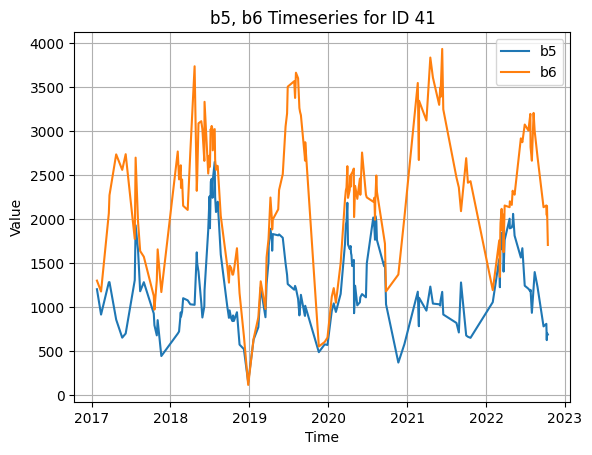

In [ ]:
timeplot_twocols_oneid(df_soil, "b5", "b6", 41)
# id = 41 is species = soil, and b5 is never same as b6. But still y

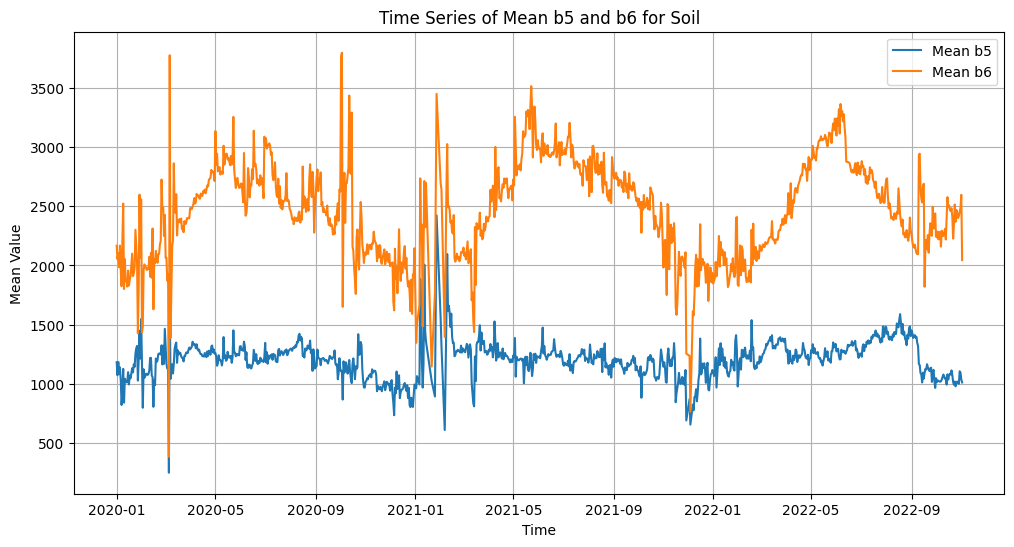

In [64]:
df_soil_sub = df_soil[df_soil["time"].dt.year > 2019]
agg_df = df_soil_sub.groupby("time")[["b5", "b6"]].mean()

plt.figure(figsize=(12,6))
plt.plot(agg_df.index, agg_df["b5"], label="Mean b5")
plt.plot(agg_df.index, agg_df["b6"], label="Mean b6")

plt.xlabel("Time")
plt.ylabel("Mean Value")
plt.title("Time Series of Mean b5 and b6 for Soil")
plt.legend()
plt.grid(True)
plt.show()